In [ ]:
#Analysis
#Observed Trend1 it seems that to find 500 unique cities we need to get double of these size of cities
#Observed Trend2 There are some cities that won’t be found in the open weather database because they’re too small

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1250)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1250)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

506

## Perform API Calls

In [3]:
# OpenWeatherMap API Key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 


# List for city data
city_data = []

# Print statement to start retrieval 
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create a record counter
record_count = 1

for city in cities:
    
    city_url = url + "&q=" + city.replace(" ","+")
    
    
    # Log the url, record, and set numbers
    print("Proceesing: City # " , record_count, ' | ' , city)

    # Add 1 to the record count
    record_count += 1
    try:
        
        response = requests.get(city_url).json()
        
        # Add all the variables you need to get the data
        city_lat = response["coord"]["lat"]
        city_lon = response["coord"]["lon"]
        city_temp = response["main"]["temp"]
        city_tempmax = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Temp": city_temp,
                          "Max Temp": city_tempmax,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    except:
        print("city not found")
        pass

			
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Proceesing: City #  1  |  thompson
Proceesing: City #  2  |  barrow
Proceesing: City #  3  |  kununurra
Proceesing: City #  4  |  bredasdorp
Proceesing: City #  5  |  coahuayana
Proceesing: City #  6  |  tabuk
Proceesing: City #  7  |  labutta
city not found
Proceesing: City #  8  |  pevek
Proceesing: City #  9  |  ajdabiya
Proceesing: City #  10  |  rikitea
Proceesing: City #  11  |  hermanus
Proceesing: City #  12  |  alvaraes
Proceesing: City #  13  |  solnechnyy
Proceesing: City #  14  |  faanui
Proceesing: City #  15  |  mataura
Proceesing: City #  16  |  amderma
city not found
Proceesing: City #  17  |  gat
Proceesing: City #  18  |  cape town
Proceesing: City #  19  |  havre-saint-pierre
Proceesing: City #  20  |  kodiak
Proceesing: City #  21  |  bradford
Proceesing: City #  22  |  chokurdakh
Proceesing: City #  23  |  puerto escondido
Proceesing: City #  24  |  khonuu
city not found
Proceesing: City #  25  |  gloucest

Proceesing: City #  210  |  vung tau
Proceesing: City #  211  |  itatiba
Proceesing: City #  212  |  valparaiso
Proceesing: City #  213  |  tuggurt
city not found
Proceesing: City #  214  |  cayenne
Proceesing: City #  215  |  novoagansk
Proceesing: City #  216  |  ler
Proceesing: City #  217  |  pemangkat
city not found
Proceesing: City #  218  |  sao felix do xingu
Proceesing: City #  219  |  pashiya
Proceesing: City #  220  |  halalo
city not found
Proceesing: City #  221  |  vaghodia
Proceesing: City #  222  |  airai
Proceesing: City #  223  |  zheleznodorozhnyy
Proceesing: City #  224  |  krasna
Proceesing: City #  225  |  grand centre
city not found
Proceesing: City #  226  |  guerrero negro
Proceesing: City #  227  |  raga
city not found
Proceesing: City #  228  |  comodoro rivadavia
Proceesing: City #  229  |  nemuro
Proceesing: City #  230  |  barentsburg
city not found
Proceesing: City #  231  |  soavinandriana
Proceesing: City #  232  |  portland
Proceesing: City #  233  |  

Proceesing: City #  422  |  ranong
Proceesing: City #  423  |  chumikan
Proceesing: City #  424  |  saint-pierre
Proceesing: City #  425  |  gbarnga
Proceesing: City #  426  |  geraldton
Proceesing: City #  427  |  chara
Proceesing: City #  428  |  hamilton
Proceesing: City #  429  |  buluang
Proceesing: City #  430  |  lichuan
Proceesing: City #  431  |  honiara
Proceesing: City #  432  |  ulaanbaatar
Proceesing: City #  433  |  malabugas
Proceesing: City #  434  |  muros
Proceesing: City #  435  |  healdsburg
Proceesing: City #  436  |  mumford
Proceesing: City #  437  |  owerri
Proceesing: City #  438  |  axim
Proceesing: City #  439  |  shimabara
Proceesing: City #  440  |  nargana
Proceesing: City #  441  |  colac
Proceesing: City #  442  |  lynn haven
Proceesing: City #  443  |  wenling
Proceesing: City #  444  |  mahebourg
Proceesing: City #  445  |  bakel
Proceesing: City #  446  |  tautira
Proceesing: City #  447  |  sampit
Proceesing: City #  448  |  griffith
Proceesing: City

In [4]:
# create a data frame from cities, lat, temp, humidity, cloudiness, wind speed and max temparature
weather_data = pd.DataFrame(city_data)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Temp,Wind Speed
0,thompson,75,CA,1535817600,62,55.74,-97.86,51.80,51.80,4.70
1,barrow,0,AR,1535820136,54,-38.31,-60.23,53.51,53.51,7.74
2,kununurra,0,AU,1535817600,64,-15.77,128.74,71.60,71.60,2.24
3,bredasdorp,0,ZA,1535817600,77,-34.53,20.04,62.60,62.60,8.05
4,coahuayana,48,MX,1535820137,79,18.62,-100.35,76.01,76.01,2.93


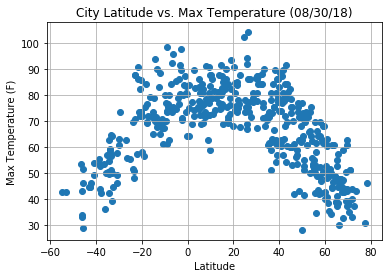

In [5]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (08/30/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

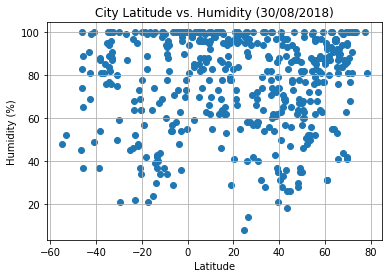

In [6]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (30/08/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

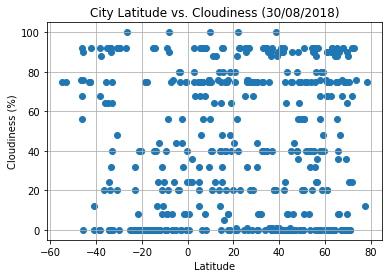

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (30/08/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

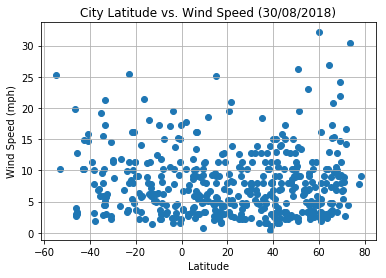

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (30/08/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()